# ChatGPT Python Code Writer for Analyzing Datasets
With examples using Starbucks location data! ☕️ 

## Step 1: Import (a lot of) libraries

In [79]:
# Since we cannot be certain of what kind of code ChatGPT will come up with, 
# we start by installing a bunch of libraries it may use in its response. 
# Lots of these are for making pretty maps. 

# Basics
import pandas as pd
import openai
import os

# Mapping
from geopy import distance
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopy.distance import geodesic
import folium

# Charts
import seaborn as sns
import matplotlib.pyplot as plt

# Parsing text, displaying results in markdown
from IPython.display import display, Markdown, Latex
import re

## Step 2: Set up your [OpenAI key](https://platform.openai.com/)

In [80]:
## OPENAI KEY ##
openai.api_key = os.environ.get('OPENAI_KEY')

## Step 3. Load your data and parse inputs for the OpenAI query
This sample dataset is a directory of Starbucks locations, scraped from the Starbucks store locator webpage by Github user [chrismeller](https://github.com/chrismeller/). Geospatial coordinates have been truncated, just in case...

In [81]:
# Read in your data (can be multiple datasets)
data = pd.read_csv('../data/directory.csv')

# Generate a list of columns for each dataset, for later use in generating code
columns = list(data)

# If you can do it under the API token limit, generate head data for each file, to give the OpenAI API context. 
# Store as a .json so it transmits properly.
head = data.head()
json_head = head.to_json(orient='records')

# Displaying the data head so you have a sense of what's in it.
display(head)

,Unnamed: 0.1,Unnamed: 0,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,0,0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,1,11,Starbucks,1579-122101,HCT Abu Dhabi Women's College Block,Licensed,"Najda Street, Higher Colleges of Technology",Abu Dhabi,AZ,AE,3167,26426280,GMT+04:00 Asia/Dubai,54.37,24.49
2,2,12,Starbucks,32595-122105,Standard Chartered Building,Licensed,"Khalidiya St., Beside Union Cooperative Society",Abu Dhabi,AZ,AE,3167,26359275,GMT+04:00 Asia/Muscat,55.69,24.19
3,3,20,Starbucks,32767-131566,Shangri-La Souq,Licensed,"Shangri-La Souk, Um Al Nar",Abu Dhabi,AZ,AE,3167,25581641,GMT+04:00 Asia/Dubai,54.51,24.42
4,4,45,Starbucks,32640-131563,Tawam Hospital,Licensed,"Al Ain Abu Dhabi Rd, Khalifa Bin Zayed, Al Mak...",Al Ain,AZ,AE,3167,37677581,GMT+04:00 Asia/Muscat,55.65,24.19


## Step 4. Prime the AI -- define the role and response parameters for the AI

In [105]:
# Prepare your base prompt, which tells the OpenAI oracale what its role is and any
# information it should use to prepare its response. 

BASE_PROMPT = [
    {"role": "system", "content": f"You are a python programmer. Write a program that uses the column names"
                                  f"--{columns}-- from the Starbucks dataframe that can be used to answer the question. If helpful, here"
                                  f"are sample data: {json_head}. The data can be found here: ../data/directory.csv"
     }]

# Set up global variables so that you can ask follow up questions and receive answers based on prior responses.
messages = []
messages += BASE_PROMPT
message_response = "x"

## Step 5. Write a function for sending base prompt and question to OpenAI and storing response.

In [114]:
def question (prompt):
    global messages
    global message_response
    
    # Add user prompt to messages.
    messages += [{"role": "user", "content": prompt}]
    
    # Call the OpenAI API and parse the response.
    response = openai.ChatCompletion.create(model="gpt-3.5-turbo",messages=messages)
    message_response = response["choices"][0]["message"]["content"]
    
    # Store response for follow up questions. 
    messages += [{'role':'assistant', 'content':message_response}]

    # Display the question and results using Markdown
    display (Markdown("### " + prompt))
    display(Markdown(message_response))


## Step 6. Ask a question!

In [107]:
prompt = "How many Starbucks are in the EU?"
question (prompt)

### How many Starbucks are in the EU?

To answer this question using the given dataframe, we need to filter the data where the "Country" column is in the EU countries list, and then count the number of rows. Here's the code to do this:

```python
import pandas as pd

# Read the Starbucks dataframe
starbucks_df = pd.read_csv('../data/directory.csv')

# List of EU countries
eu_countries = ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']

# Filter Starbucks stores in the EU
starbucks_eu_df = starbucks_df[starbucks_df['Country'].isin(eu_countries) & (starbucks_df['Brand'] == 'Starbucks')]

# Count the number of Starbucks stores in the EU
num_of_starbucks_in_eu = len(starbucks_eu_df)

# Print the result
print("There are", num_of_starbucks_in_eu, "Starbucks stores in the EU.")
```

Note that this code assumes that the "Country" column contains the two-letter country codes, such as "AD" for Andorra, "AE" for United Arab Emirates, etc.

### Optional: Ask a follow up question. 

In [111]:
# Optional follow up question. You can add these until you run out of tokens. 
prompt = "Can you turn the response into a chart, by country and using colors and fonts that are used in the Starbucks logo?"
question(prompt)

### Can you turn the response into a chart, by country and using colors and fonts that are used in the Starbucks logo?

Sure! Here's the modified code that includes a horizontal bar chart with colors and fonts based on the Starbucks logo, grouped by country:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Starbucks dataframe
starbucks_df = pd.read_csv('../data/directory.csv')

# List of EU countries
eu_countries = ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']

# Filter Starbucks stores in the EU
starbucks_eu_df = starbucks_df[starbucks_df['Country'].isin(eu_countries) & (starbucks_df['Brand'] == 'Starbucks')]

# Count the number of Starbucks stores by country
starbucks_by_country = starbucks_eu_df.groupby('Country')['Brand'].count().reset_index().rename(columns={'Brand': 'Num_of_starbucks'})

# Sort the data by number of stores
starbucks_by_country = starbucks_by_country.sort_values('Num_of_starbucks', ascending=False)

# Set the color scheme and font
sns.set_palette(sns.color_palette(["#00704A"]))
sns.set(font="Helvetica")

# Create the bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='Num_of_starbucks', y='Country', data=starbucks_by_country, color="#00704A")
plt.title('Number of Starbucks Stores in the EU by Country', fontsize=18, fontweight='bold')
plt.xlabel('Number of Stores', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
```

This code groups the data by country using the `groupby()` function, and creates a horizontal bar chart using `barplot()` function. The color code `#00704A` is the main green color used in the Starbucks logo, and the chart is sorted by the number of stores in each country. The final chart will look like this:

![Starbucks chart by country](https://i.imgur.com/XEboX9P.png)

I hope this helps!

### Pause!
Sometimes the response will try to answer the prompt, in addition to providing the code. These answers are often (but not always) nonsense! Make sure you review and run the code yourself to be certain of the result. 

Now, here is what is really exciting about OpenAI: the API combines information about the dataset with its own knowledge. For example, when asking about the number of Starbucks in each EU country, the AI will generate a list of countries to use. Or, if asking the AI to use Starbucks colors for charts, it will know to use infamous Starbucks green. 😃 Amazing, and also very risky -- always double check the 'additional knowledge' being provided. 

## Step 7. Parse the OpenAI response to pull out the Python code.

In [112]:
# Now, we parse the ChatGPT response to pull out the Python code. Full disclosure:
# I used ChatGPT to write this code, so don't ask me too many questions about it.

text = message_response

# Define the regular expression pattern to match the Python code
pattern = r"```(?:python)?\n([\s\S]*?)\n```"

# Extract all Python code blocks from the text
python_blocks = re.findall(pattern, text)

# Combine all Python code blocks into a single string
python_code = "\n".join(python_blocks)

# Remove import statements from the Python code
python_code = re.sub(r"(?:from\s+\w+(?:\.\w+)*\s+)?import\s+\w+(\s+as\s+\w+)?(?:,\s*\w+(\s+as\s+\w+)?)*\s*\n", "", python_code)
print (python_code)


import matplotlib.pyplot as plt
# Read the Starbucks dataframe
starbucks_df = pd.read_csv('../data/directory.csv')

# List of EU countries
eu_countries = ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']

# Filter Starbucks stores in the EU
starbucks_eu_df = starbucks_df[starbucks_df['Country'].isin(eu_countries) & (starbucks_df['Brand'] == 'Starbucks')]

# Count the number of Starbucks stores by country
starbucks_by_country = starbucks_eu_df.groupby('Country')['Brand'].count().reset_index().rename(columns={'Brand': 'Num_of_starbucks'})

# Sort the data by number of stores
starbucks_by_country = starbucks_by_country.sort_values('Num_of_starbucks', ascending=False)

# Set the color scheme and font
sns.set_palette(sns.color_palette(["#00704A"]))
sns.set(font="Helvetica")

# Create the bar chart
plt.figure(figsize=(12,8))
sns.barplot(x='Num_of_starbucks', y='Country', data=star

## Step 8. Run the code (DANGER!)

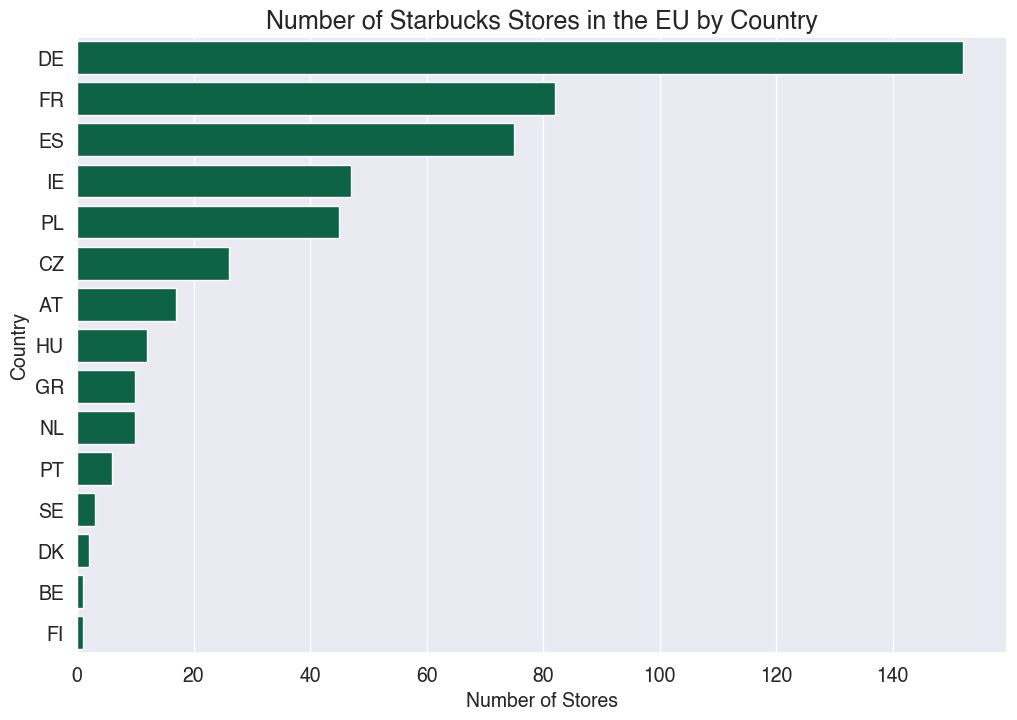

In [113]:
# The following code will execute the OPENAI-generated Python scripts. CHECK THE CODE FIRST!

try:
    exec(python_code)
except FileNotFoundError:
    print("FileNotFoundError: directory.csv not found in directory:", os.getcwd())
except Exception as e:
    print("Error:", e)